In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#Model class ti inhert nn.Module
class Model(nn.Module):
    def __init__(self,in_features=4, h1=8, h2=8, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
model = Model()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
df['species'] = df['species'].replace('setosa',0.0)
df['species'] = df['species'].replace('versicolor',1.0)
df['species'] = df['species'].replace('virginica',2.0)

<ipython-input-122-f2d7f6fde9b4>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('virginica',2.0)


In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#Train Test Split
x = df.drop('species',axis=1)
y = df['species']


In [ ]:
#convert into numpy array
x = x.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [ ]:
#convert x, y into float/long tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [ ]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.094542145729065
Epoch: 10 Loss: 0.9013770818710327
Epoch: 20 Loss: 0.6339343786239624
Epoch: 30 Loss: 0.44704338908195496
Epoch: 40 Loss: 0.31936079263687134
Epoch: 50 Loss: 0.20369571447372437
Epoch: 60 Loss: 0.1252915859222412
Epoch: 70 Loss: 0.08453059941530228
Epoch: 80 Loss: 0.06463070958852768
Epoch: 90 Loss: 0.05451591685414314


Text(0.5, 0, 'Epoch')

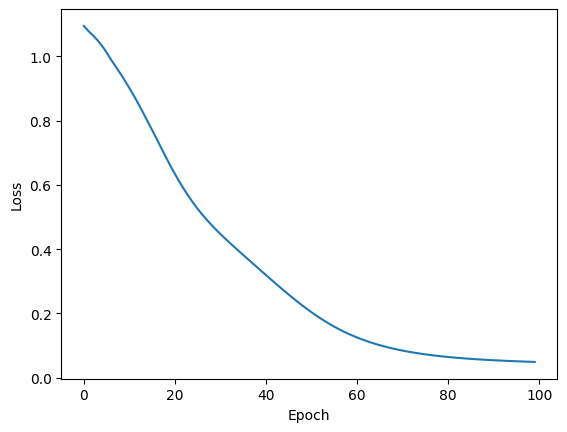

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)

In [ ]:
loss

tensor(0.0907)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    if y_test[i] == 0.0:
      x = 'setosa'
    elif y_test[i] == 1.0:
      x = 'versicolor'
    else:
      x = 'virginica'

    print(f'{i+1}.) {str(y_val)} \t {x}')

#chech the error
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'\nthere is {correct} correct')

1.) tensor([ 15.1468,   9.1584, -18.1061]) 	 setosa
2.) tensor([ 14.9078,   9.1420, -17.8860]) 	 setosa
3.) tensor([ 13.4319,   8.1306, -16.0124]) 	 setosa
4.) tensor([-9.6127,  2.9060,  7.8966]) 	 virginica
5.) tensor([-0.3800,  5.2947, -1.8554]) 	 versicolor
6.) tensor([-0.6001,  5.0095, -1.5104]) 	 versicolor
7.) tensor([-7.4153,  3.7321,  5.4413]) 	 virginica
8.) tensor([-10.3838,   3.1340,   8.4881]) 	 virginica
9.) tensor([-1.1612,  5.5193, -1.2444]) 	 versicolor
10.) tensor([-10.9309,   3.7289,   8.7070]) 	 virginica
11.) tensor([ 13.1705,   7.8573, -15.6301]) 	 setosa
12.) tensor([-9.6725,  3.3659,  7.7264]) 	 virginica
13.) tensor([ 0.9975,  5.0547, -3.0132]) 	 versicolor
14.) tensor([-1.7005,  4.9355, -0.4489]) 	 versicolor
15.) tensor([ 12.9774,   7.8265, -15.4400]) 	 setosa
16.) tensor([-1.4670,  5.3345, -0.8664]) 	 versicolor
17.) tensor([ 15.7384,   9.2687, -18.6985]) 	 setosa
18.) tensor([ 14.1421,   8.4314, -16.8112]) 	 setosa
19.) tensor([ 13.5866,   8.4853, -16.3439])